In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from scipy.stats import multivariate_normal

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.utils import shuffle

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])


In [3]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    for i in range(num_features):
        median = X[i].median()
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = median
    return X_new
        
    
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X, alpha = 0.25):
    q25 = X.quantile(alpha, axis=0)
    q75 = X.quantile(1-alpha, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_13_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_13_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_13_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 10)
(1000,)
(10000, 10)


In [8]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x114bb7b70>)

In [9]:
skb.scores_

array([ 0.00432954,  0.00432954,  0.        ,  0.        ,  0.01699245,
        0.01639907,  0.        ,  0.        ,  0.        ,  0.01905829])

In [10]:
np.sort(skb.scores_)[::-1][:10]

array([ 0.01905829,  0.01699245,  0.01639907,  0.00432954,  0.00432954,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

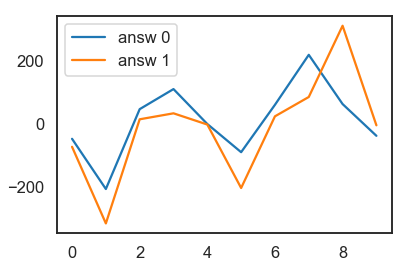

In [11]:
plt.plot(np.mean(X_train_load[np.where(y_train_load==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train_load[np.where(y_train_load==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_13_FeatureMean.pdf')

In [12]:
skb.k = 10

In [13]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 10)
(1000,)
(10000, 10)


In [15]:
print("0 in train:", X_train[y_train==0].shape[0], '\n', "1 in train:", X_train[y_train==1].shape[0])

0 in train: 834 
 1 in train: 166


In [16]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-8340 -1000
166


In [17]:
# pd.DataFrame(X_train).describe()

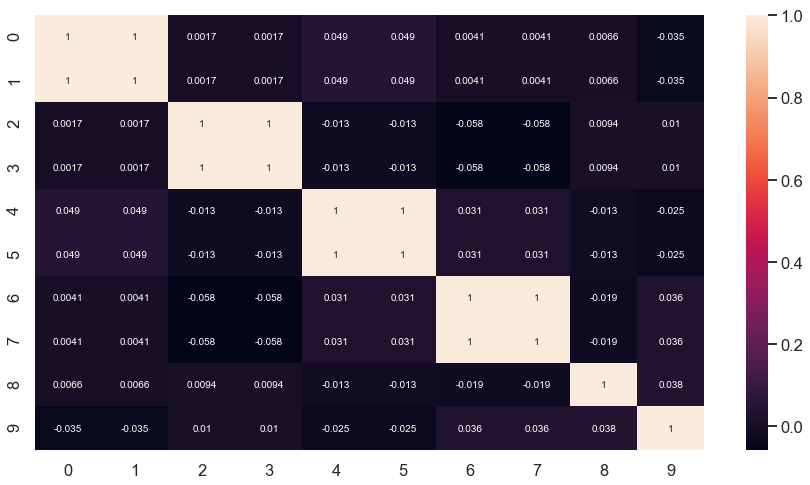

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)

In [19]:
print(X_train[:,0] - X_train[:,1])

[  5.27510252e-06  -9.58282410e-06   2.30941561e-06   1.93413652e-06
  -1.54026058e-05   7.37574216e-06  -7.25978708e-06   1.75010288e-05
   8.75104407e-06   1.37425156e-07  -1.12680456e-05  -2.15819224e-07
   5.72984287e-06   3.24923287e-06  -7.33370500e-06  -1.24448598e-05
  -1.43972621e-05   1.20064489e-05  -1.02819554e-05  -1.48545267e-05
  -4.63807551e-06  -7.31930994e-06  -1.13039895e-05  -2.90328682e-06
  -3.04703166e-06  -1.61139636e-05   2.90485047e-06   9.40878280e-06
   1.15628978e-05   1.15787514e-05   3.55267413e-06   2.48569564e-05
   3.06006958e-06  -4.62159147e-07  -1.75773254e-06   1.25063746e-05
  -1.81675220e-06   6.49070207e-06  -1.83338901e-05   1.00480142e-05
   1.72320546e-05   1.00610505e-05  -2.82033194e-06  -1.23249451e-06
  -7.36152238e-06   1.13734455e-05   5.93392739e-06  -1.00026460e-05
   3.56601324e-07  -1.06828298e-05   1.19442420e-05  -2.66893265e-06
  -2.96409069e-06  -6.86647973e-06   4.14883331e-06   1.26495424e-05
   1.78249327e-06  -1.50812370e-05

In [24]:
saved_features = [1, 3, 5, 7, 8, 9]
X_train = X_train[:,saved_features]
X_test = X_test[:,saved_features]

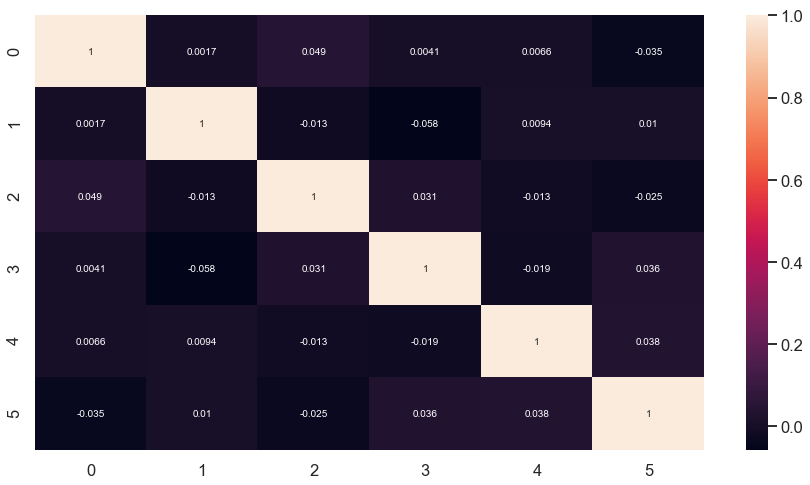

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)

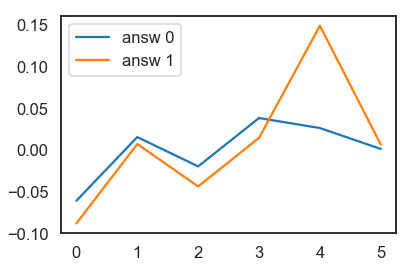

In [26]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

# plt.savefig('Practise_13_FeatureMean.pdf')

In [27]:
# sns.pairplot(pd.DataFrame(np.hstack([X_train, np.reshape(y_train, [-1,1])])))

In [28]:
# _svm = svm.OneClassSVM(gamma=10, nu=0.1)


# labels = _svm.fit(np.hstack([X_train, np.reshape(y_train, [-1,1])])).predict(np.hstack([X_train, np.reshape(y_train, [-1,1])]))


In [29]:
# (labels==1).mean()

In [30]:
print(X_train.shape, y_train.shape)

(1000, 6) (1000,)


In [31]:
# X_train_new = np.array(X_train)
# X_test_new = np.array(X_test)
# y_train_new = np.array(y_train)

In [32]:
X_train_new, y_train_new = SMOTE().fit_sample(X_train, y_train)
X_test_new = np.array(X_test)

In [33]:
np.sum(y_train_new)

834

In [34]:
rho = 0.5
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)





ACC 0.705635491607
AUC 0.772185129594
NUM 491
ASY1 -2301
ASY2 -394


In [35]:
rho = 0.9
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)





ACC 0.5
AUC 0.770963804496
NUM 834
ASY1 -7506
ASY2 0


In [36]:
rho = 0.66
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.685251798561
AUC 0.772359091144
NUM 525
ASY1 -5516
ASY2 -497


In [37]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_13_answ.csv', sep = ',')
